In [108]:
import pandas as pd
import seaborn as sns
import numpy as np

In [109]:
from imblearn.over_sampling import SMOTE  # pyright: reportMissingImports=false

In [110]:
# random seed

np.random.seed(42)


set1no= 900
set2no=100

In [111]:
df1= pd.DataFrame({
    "feature_1": np.random.normal(loc=0,scale=1,size=set1no),
    "feature_2": np.random.normal(loc=0,scale=1,size=set1no),
    "target": [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set2no),
    "feature_2": np.random.normal(loc=0,scale=1,size=set2no),
    "target": [1] * set2no
})

In [112]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [113]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [114]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [115]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [116]:
df["target"].unique()

array([0, 1])

In [117]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

#### upsampling ---> upsample minority

#### downsampling ---> downsample majority

In [118]:
# upsampling

df_minority = df[df["target"] ==1]

In [119]:
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [120]:
df_majority = df[df["target"]==0]

In [121]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [122]:
from sklearn.utils import resample  # pyright: reportMissingImports=false

In [123]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority),random_state=42)

In [124]:
df_minority_upsampled.shape

(900, 3)

In [125]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1


In [126]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [127]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [128]:
df_majority_downsampled =resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

In [129]:
df_majority_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [130]:
df_majority_downsampled["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [131]:
df_downsampled= pd.concat([df_majority_downsampled, df_minority])

In [132]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

### SMOTE (Synthetic Minority Over-sampling Technique)

In [133]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


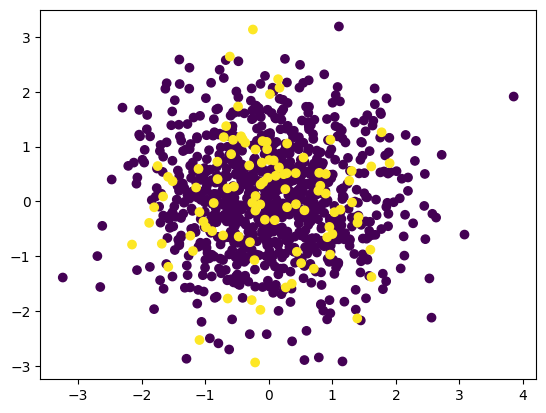

In [134]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"],df["feature_2"], c=df["target"])

In [135]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [136]:
from imblearn.over_sampling import SMOTE  # pyright: reportMissingImports=false

In [137]:
oversample = SMOTE()

In [138]:
(X,y)= oversample.fit_resample(df[["feature_1","feature_2"]],df["target"])

/Users/seyma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [144]:
oversample_df= pd.concat([X,y],axis=1)

In [145]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [139]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [140]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.701868,-0.173309
1796,1.545917,-1.335943
1797,1.358114,-0.225781
1798,0.486916,-0.147628


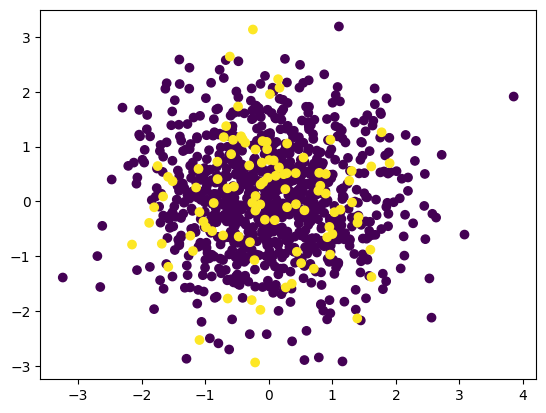

In [141]:
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

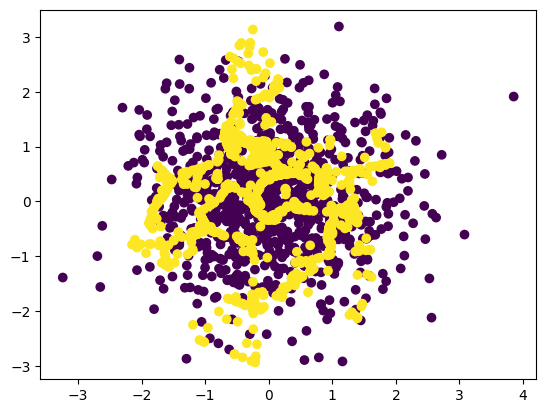

In [146]:
plt.scatter(oversample_df["feature_1"], oversample_df["feature_2"], c=oversample_df["target"])